In [136]:
%reset

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

<xarray.Dataset>
Dimensions:  (Time: 28, south_north: 1851, east_west: 1357)
Coordinates:
  * Time     (Time) datetime64[ns] 2019-02-01T03:00:00 ... 2019-02-28T03:00:00
    XLAT     (south_north, east_west) float32 ...
    XLONG    (south_north, east_west) float32 ...
Dimensions without coordinates: south_north, east_west
Data variables:
    snod     (Time, south_north, east_west) float32 ...
Attributes:
    units:          meters
    standard_name:  snow depth

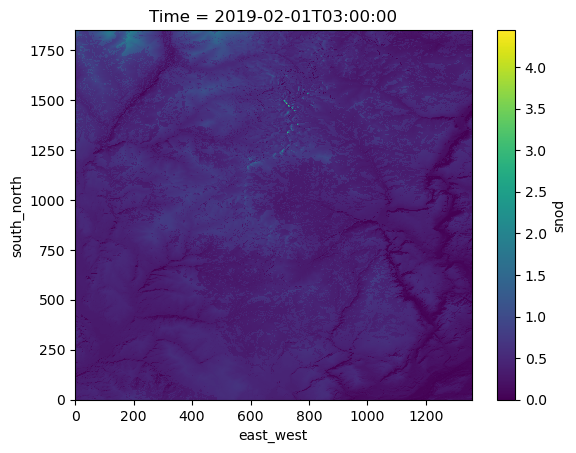

In [3]:
snod_ds = xr.open_dataset('/Users/nicoleta/Downloads/snod_2019_02.nc')
snod_ds.snod.sel(Time = "2019-02-01").plot()
snod_ds

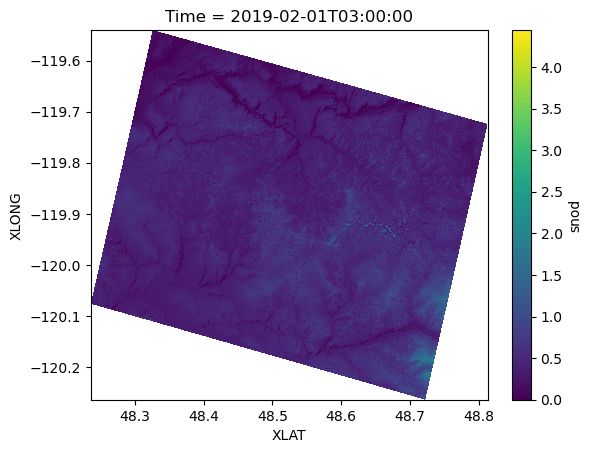

In [4]:
snod_ds.snod.sel(Time = "2019-02-01").plot(x="XLAT", y="XLONG")

In [5]:
t = snod_ds.snod.values
lon = snod_ds.XLONG.values
lat = snod_ds.XLAT.values
time = snod_ds.Time.values

In [6]:
snod_ds = snod_ds.assign_coords(dict(lat=(['x','y'], lat), lon=(['x','y'], lon)))
snod_ds

<xarray.Dataset>
Dimensions:  (Time: 28, south_north: 1851, east_west: 1357, x: 1851, y: 1357)
Coordinates:
  * Time     (Time) datetime64[ns] 2019-02-01T03:00:00 ... 2019-02-28T03:00:00
    XLAT     (south_north, east_west) float32 48.24 48.24 48.24 ... 48.81 48.81
    XLONG    (south_north, east_west) float32 -120.1 -120.1 ... -119.7 -119.7
    lat      (x, y) float32 48.24 48.24 48.24 48.24 ... 48.81 48.81 48.81 48.81
    lon      (x, y) float32 -120.1 -120.1 -120.1 -120.1 ... -119.7 -119.7 -119.7
Dimensions without coordinates: south_north, east_west, x, y
Data variables:
    snod     (Time, south_north, east_west) float32 0.3653 0.3659 ... 0.8136
Attributes:
    units:          meters
    standard_name:  snow depth

In [7]:
snod_ds.south_north

<xarray.DataArray 'south_north' (south_north: 1851)>
array([   0,    1,    2, ..., 1848, 1849, 1850])
Dimensions without coordinates: south_north

In [8]:
dsTotal = xr.Dataset({'snod': (['time','x','y'], t)},
                     coords = {'longitude': (['x','y'], lon),
                               'latitude': (['x','y'], lat),
                               'time': time})
dsTotal

<xarray.Dataset>
Dimensions:    (time: 28, x: 1851, y: 1357)
Coordinates:
    longitude  (x, y) float32 -120.1 -120.1 -120.1 ... -119.7 -119.7 -119.7
    latitude   (x, y) float32 48.24 48.24 48.24 48.24 ... 48.81 48.81 48.81
  * time       (time) datetime64[ns] 2019-02-01T03:00:00 ... 2019-02-28T03:00:00
Dimensions without coordinates: x, y
Data variables:
    snod       (time, x, y) float32 0.3653 0.3659 0.3678 ... 0.7926 0.8136

In [9]:
temp = dsTotal.snod.sel(latitude = 48.5, longitude = -119.8)

KeyError: "no index found for coordinate 'latitude'"

In [ ]:

#temp =  dsTotal.snod.sel(x = 2, y = 3).plot()
temp =  dsTotal.snod.sel(x = 2, y = 3).plot()

In [ ]:
#dat = dsTotal.snod.sel(time = "2019-02-01")
#dat.plot()
#plt.plot(dat, x = lat, y = lon)
#plt.show()


In [ ]:
coords = {'longitude': (['x','y'], lon),
          'latitude': (['x','y'], lat),
          'time': time}

dsTotal = dsTotal.assign_coords(coords)
dsTotal

In [ ]:
# Promote non-dimensional coordinates to dimensions
dsTotal = dsTotal.assign_coords(dict(lat=(['x','y'], lat), lon=(['x','y'], lon)))
dsTotal


In [10]:
tem = dsTotal.snod.sel(lat = 48.5, lon = -119.8)

KeyError: "'lat' is not a valid dimension or coordinate"